# Proyecto Automobile

Este dataset consta de datos del Anuario automotriz de Ward de 1985 y el objetivo es predecir el precio del automóvil a partir de sus caracteristicas, las cuales se puede dividir en tres categorías:

1. La especificación de un automóvil en términos de varias características
2. Su calificación de riesgo de seguro asignada
3. Sus pérdidas normalizadas en uso en comparación con otros automóviles.

Y las variables del datset son:
- Symboling: Factor de riesgo asociado con el precio, evaluado en una escala del -2 al 3. Si el automóvil es más riesgoso de lo que indica su precio el factor del riesgo será mayor, de lo contrario será menor
- Normalized-losses: Pérdidas normalizadas expresadas en valores continuos de 65 a 256
- Make: Marca Alfa-Romero, Audi, BMW, Chevrolet, Dodge, Honda, Isuzu, Jaguar, Mazda, Mercedes-Benz, Mercury, Mitsubishi, Nissan, Peugot, Plymouth, Porsche, Renault, Saab, Subaru, Toyota, Volkswagen, Volvo
- Fuel-type: tipo de combustible diesel, gas
- Aspiration: Tipo de aspiración, std o turbo
- Num-of-doors: Número de puertas, two o four
- Body-style: Estilo de la carrocería, hardtop(techo duro), wagon(vagón), sedan(sedán), hatchback(compacto), convertible(convertible)
- Drive-wheels: Ruedas motrices, rwd, fwd, 4wd
- Engine-location: ubicación del motor front(delantero), rear(trasero)
- Wheel-base: Distancia de los ejes expresado en valores continuos
- Length: Longitud expresada en valores continuos
- Width: Ancho expresado en valores continuos
- Height: Alto expresado en valores continuos
- Curb-weight: Peso en vacío expresado en valores continuos
- Engine-type: Tipo de motor dohc, ohcv, ohc, l, rotor, ohcf, dohcv
- Num-of-cylinders: Número de cilindros four, six, five, three, twelve, two, eight
- Engine-size: Tamaño del motor expresado en valores continuos
- Fuel-system: Sistema de combustible mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi
- Bore: Diamétro expresado en valores continuos
- Stroke: carrera o distancia recorrida por el pistón durante cada ciclo expresado en valores continuos
- Compression-ratio: Relación de compresión expresada en valores continuos
- Horsepower: Caballos de fuerza expresado en valores continuos
- Peak-rpm: RPM máximas (revoluciones por minuto que alcanza un vehículo cuando se encuentra a potencia máxima) expresado en valores continuos
- City-mpg: Consumo de combustible "millas por galón" en ciudad, expresado en valores continuos
- highway-mpg: Consumo de combustible "millas por galón" en carretera, expresado en valores continuos
- Price: Precio 

https://www.kaggle.com/toramky/automobile-dataset


In [1]:
# importación de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## Carga de datos

In [2]:
data = pd.read_csv("automobile_data.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


A simple viste se observa que la columna normalized-losses tiene el carácter "?" que debe ser reemplazado y debemos revisar las demás columnas.

In [3]:
# información de cada tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

La variable normalized-losses dice que es de tipo object pero según la descripción de las misma son valores continuos, puede ser que el carácter "?" este generando problemas.

## Análisis exploratorio de los datos

In [4]:
# revisar nulos 
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

No se aprecian valores nulos, es decir que no se está considerando el carácter "?" como nulo.

In [5]:
# valores unicos de cada variable categorica
data.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

Según la descripción, tenemos variables categóricas hasta 22 valores únicos como es la make.

In [6]:
# principales estadisticas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


Del resumen estadistico no se aprecian valores en cero y tampoco se observa la variable normalized-losses, por lo que primero se va a corregir los nulos para que el resumen estadistico contenga todas las variables numéricas.

### Valores nulos

De la descripción de las variables se pudo observar que "normalized-losses" es númerica y que contiene el carácter "?", el cuál se supone está cambiando el tipo de dato de númerico a object. En esta sección se van a buscar las variables que contengan dicho carácter para reemplazarlos con NA.

In [7]:
# Se buscar y se reemplazan todos los carácteres "?" por NA

automobile_data_copy = data.copy()
automobile_data_copy = automobile_data_copy.replace("?", np.nan)
automobile_data_copy.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [38]:
# Revisión de los datos nulos nuevamente

nulos = automobile_data_copy.isnull().sum().to_frame()
nulos = nulos.loc[nulos[0] != 0]
nulos

,0
normalized-losses,41
num-of-doors,2
bore,4
stroke,4
horsepower,2
peak-rpm,2
price,4


Las variables normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm y price contenían el carácter "?", y ahora se pueden ver como datos nulos.

In [30]:
# Se separan las variables numéricas y categóricas

df = automobile_data_copy.nunique().to_frame()
variablesNumericas = df.loc[df[0] > 22]
variablesCategoricas = df.loc[df[0] <= 22]

In [48]:
# se convierten a lista las variables numéricas y las que continen nulos, se encuentra la diferencia entre ellas
# y se convierten a variables numéricas

listaVariablesNumericas = list(variablesNumericas.index)
listaVariablesConNulos = list(nulos.index)
variablesAConvertir = set(listaVariablesNumericas) & set(listaVariablesConNulos)
automobile_data_copy[list(variablesAConvertir)] = automobile_data_copy[list(variablesAConvertir)].astype('float64')

In [49]:
# Se revisa nuevamente el tipo de dato de cada variable para comprobar la corrección

automobile_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [53]:
# principales estadisticas
automobile_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17


- Ahora el resumen de las principales estadisticas incluye todas las variables númericas.
- No se aprecian valores en cero y la variable symboling tiene negativos pero es correcto según la descripción de la variable.

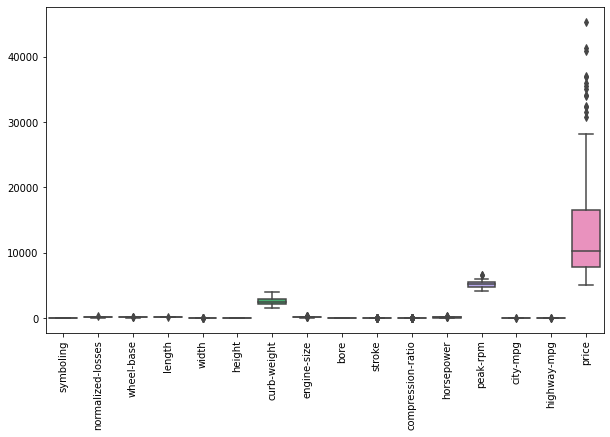

In [54]:
# Rango de los datos

plt.figure(figsize=(10, 6))
sns.boxplot(data=automobile_data_copy)
plt.xticks(rotation=90)
plt.show()

El rango de los datos para las variables price, peak-rpm y curb-weight es más grande por lo que las variables se deben estandarizar.

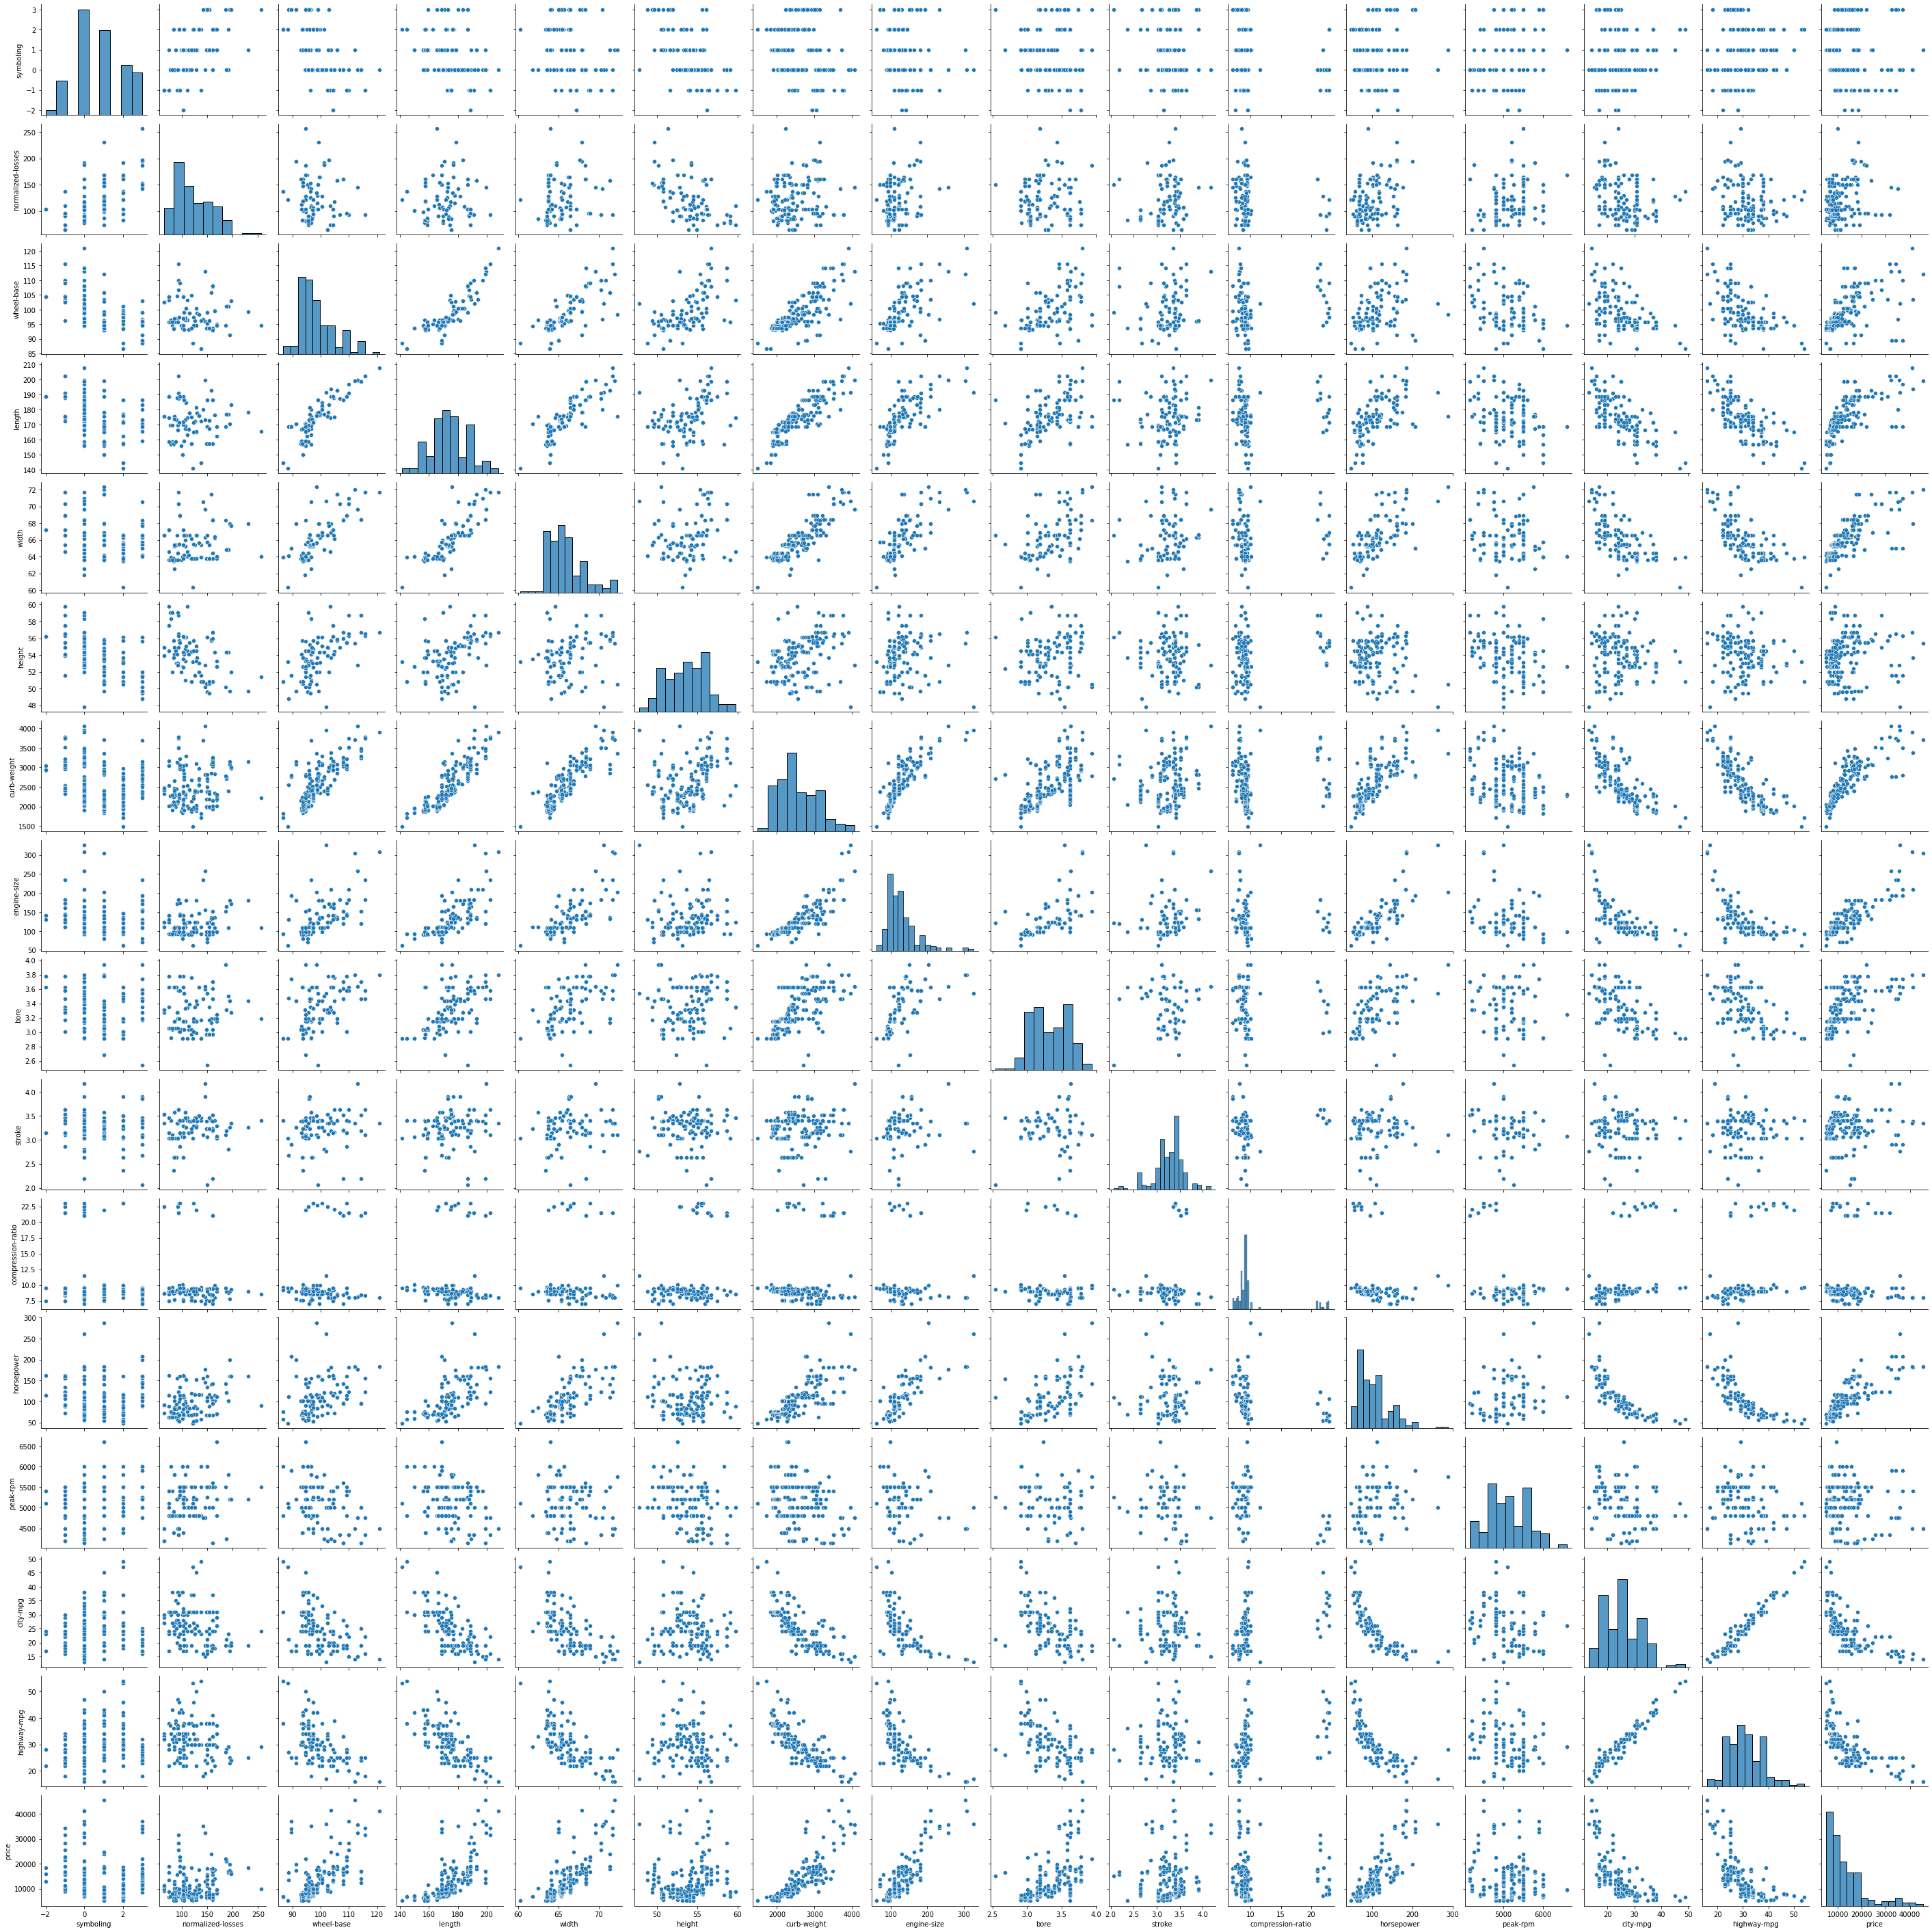

In [55]:
# Relación entre las variables

sns.pairplot(automobile_data_copy)

Aunque se ven tendencias en las relaciones, el gráfico se hace dificil de leer por lo que se hará un análisis con menos variables.

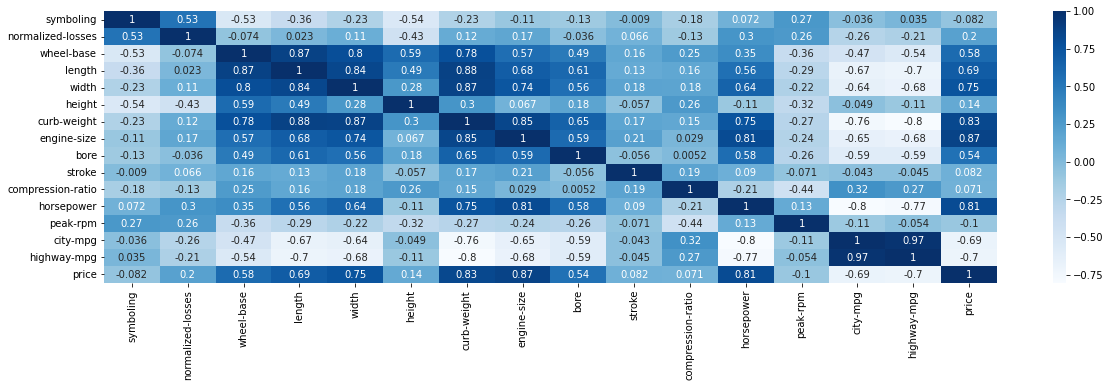

In [57]:
# Matriz de correlación entre las variables

plt.figure(figsize = (20,5))
sns.heatmap(automobile_data_copy.corr(), cmap="Blues", annot=True)
plt.show()

- La correlación entre las variables highway-mpg y city-mpg es muy alta, quiere decir que el consumo de gasolina por milla es similar en la ciudad y  en carretera.
- La variable curb-weight esta correlacionada con las variables length y width.
- La vairbale lenght y wheel-base, estan relacionadas y tiene sentido el largo del carro con la distancia entre los ejes.
- El precio del autómovil está relacionado fuertemente con el tamaño del motor y caballos de fuerza y de forma negativa con el consumo de gasolina por galon.

En general las medidas del carro están relacionados entre sí pero se verán al detalle.

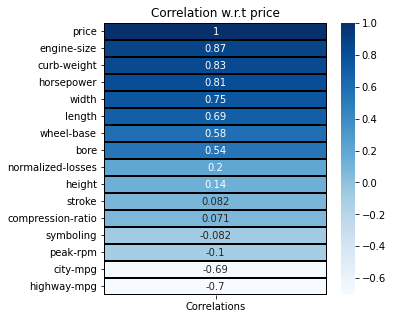

In [58]:
# Correlación con la variable salida

corr = automobile_data_copy.corrwith(automobile_data_copy['price']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap="Blues", linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t price')
plt.show()

- La variable más correlacionada con la variable precio es tamaño del moto, seguido del peso en vacío y después por los caballos de fuerta.
- La variable de salida esta inversamente correlacionada con la variable peak-rpm (revoluciones por minuto), seguido del consumo de gasolina por milla en ciudad y en carro.

### Variables númericas

In [34]:
data["normalized-losses"] = data["normalized-losses"].replace('?', np.NaN)
data["normalized-losses"] = data["normalized-losses"].astype('float64')
num-of-door también tiene ??
stroke tiene ?
price ?